In [325]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
import matplotlib.pyplot as plt

In [346]:
def load_crime_data():
  #loading the data
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data
  #assigning the attributes to the data
  attributes =['state','county','community','communityname','fold','population','householdsize  ','racepctblack  ','racePctWhite  ','racePctAsian  ','racePctHisp  ','agePct12t21  ','agePct12t29  ','agePct16t24  ','agePct65up  ','numbUrban  ','pctUrban  ','medIncome  ','pctWWage  ','pctWFarmSelf  ','pctWInvInc  ','pctWSocSec  ','pctWPubAsst  ','pctWRetire  ','medFamInc  ','perCapInc  ','whitePerCap  ','blackPerCap  ','indianPerCap  ','AsianPerCap  ','OtherPerCap  ','HispPerCap  ','NumUnderPov  ','PctPopUnderPov  ','PctLess9thGrade  ','PctNotHSGrad  ','PctBSorMore  ','PctUnemployed  ','PctEmploy  ','PctEmplManu  ','PctEmplProfServ  ','PctOccupManu  ','PctOccupMgmtProf  ','MalePctDivorce  ','MalePctNevMarr  ','FemalePctDiv  ','TotalPctDiv  ','PersPerFam  ','PctFam2Par  ','PctKids2Par  ','PctYoungKids2Par  ','PctTeen2Par  ','PctWorkMomYoungKids  ','PctWorkMom  ','NumIlleg  ','PctIlleg  ','NumImmig  ','PctImmigRecent  ','PctImmigRec5  ','PctImmigRec8  ','PctImmigRec10  ','PctRecentImmig  ','PctRecImmig5  ','PctRecImmig8  ','PctRecImmig10  ','PctSpeakEnglOnly  ','PctNotSpeakEnglWell  ','PctLargHouseFam  ','PctLargHouseOccup  ','PersPerOccupHous  ','PersPerOwnOccHous  ','PersPerRentOccHous  ','PctPersOwnOccup  ','PctPersDenseHous  ','PctHousLess3BR  ','MedNumBR  ','HousVacant  ','PctHousOccup  ','PctHousOwnOcc  ','PctVacantBoarded  ','PctVacMore6Mos  ','MedYrHousBuilt  ','PctHousNoPhone  ','PctWOFullPlumb  ','OwnOccLowQuart  ','OwnOccMedVal  ','OwnOccHiQuart  ','RentLowQ  ','RentMedian  ','RentHighQ  ','MedRent  ','MedRentPctHousInc  ','MedOwnCostPctInc  ','MedOwnCostPctIncNoMtg  ','NumInShelters  ','NumStreet  ','PctForeignBorn  ','PctBornSameState  ','PctSameHouse85  ','PctSameCity85  ','PctSameState85  ','LemasSwornFT  ','LemasSwFTPerPop  ','LemasSwFTFieldOps  ','LemasSwFTFieldPerPop  ','LemasTotalReq  ','LemasTotReqPerPop  ','PolicReqPerOffic  ','PolicPerPop  ','RacialMatchCommPol  ','PctPolicWhite  ','PctPolicBlack  ','PctPolicHisp  ','PctPolicAsian  ','PctPolicMinor  ','OfficAssgnDrugUnits  ','NumKindsDrugsSeiz  ','PolicAveOTWorked  ','LandArea  ','PopDens  ','PctUsePubTrans  ','PolicCars  ','PolicOperBudg  ','LemasPctPolicOnPatr  ','LemasGangUnitDeploy  ','LemasPctOfficDrugUn  ','PolicBudgPerPop  ','ViolentCrimesPerPop  ',]
  df = pd.read_csv('communities.data', header=None,na_values=['?'],names = attributes)
  df.head()
  #removing the columns as they are non-predictive
  df = df.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
  df.head()
  #checking if any column has null value
  feat_miss = df.columns[df.isnull().any()]

  print(feat_miss)
  feat_miss.shape
  #substituting NaN with 0
  df=df.fillna(0)
  #Normalizing the data
  df=(df-df.min())/(df.max()-df.min())
  x, y = df.iloc[:, :122].values, df.iloc[:, 122].values
  print(y)
  #Dividing the data in test and training samples
  num_test_samples = 1000
  x_test = x[:num_test_samples]
  y_test = y[:num_test_samples]
  x_training = x[num_test_samples:]
  y_training = y[num_test_samples:]

load_crime_data()

--2021-02-17 04:36:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1102815 (1.1M) [application/x-httpd-php]
Saving to: ‘communities.data.9’

communities.data.9  100%[===================>]   1.05M  2.68MB/s    in 0.4s    

2021-02-17 04:36:37 (2.68 MB/s) - ‘communities.data.9’ saved [1102815/1102815]

Index(['OtherPerCap  ', 'LemasSwornFT  ', 'LemasSwFTPerPop  ',
       'LemasSwFTFieldOps  ', 'LemasSwFTFieldPerPop  ', 'LemasTotalReq  ',
       'LemasTotReqPerPop  ', 'PolicReqPerOffic  ', 'PolicPerPop  ',
       'RacialMatchCommPol  ', 'PctPolicWhite  ', 'PctPolicBlack  ',
       'PctPolicHisp  ', 'PctPolicAsian  ', 'PctPolicMinor  ',
       'OfficAssgnDrugUnits  ', 'NumKindsDrugsSeiz  ', 'PolicAveOTWorked  ',
       'PolicCars  ', 

In [355]:
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.12,0.45,0.00,0.00,0.0,0.0,0.00,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.01,0.21,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.39,0.28,0.00,0.00,0.0,0.0,0.00,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.04,0.09,0.02,0.00,0.00,0.0,0.0,0.00,0.00,0.03


In [356]:
k=10
num_validation_sample =len(x_training)//k
print(num_validation_sample)
validation_scores =[]

99


partial_x_train.shape (895, 122)
Model: "sequential_206"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_593 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_594 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_595 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_596 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 0.7665 - mae: 0.7665 - val_loss: 0.1909 - val_mae: 0.1909
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss

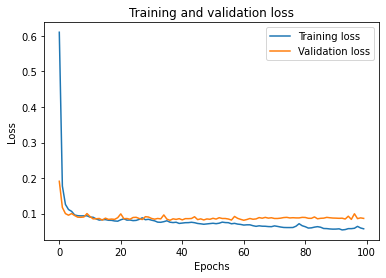

partial_x_train.shape (895, 122)
Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_597 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_598 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_599 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_600 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 0.5324 - mae: 0.5324 - val_loss: 0.1822 - val_mae: 0.1822
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss

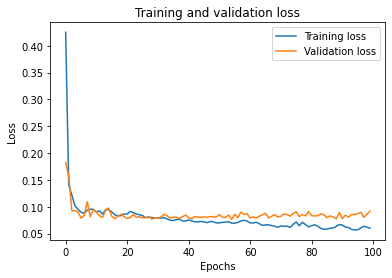

partial_x_train.shape (895, 122)
Model: "sequential_208"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_601 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_602 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_603 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_604 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 0.7693 - mae: 0.7693 - val_loss: 0.1318 - val_mae: 0.1318
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss

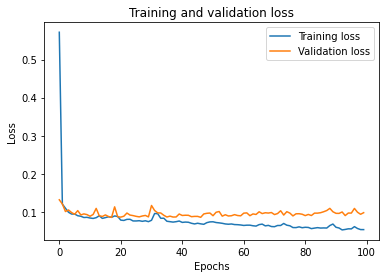

partial_x_train.shape (895, 122)
Model: "sequential_209"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_605 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_606 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_607 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_608 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 0.5388 - mae: 0.5388 - val_loss: 0.1176 - val_mae: 0.1176
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss

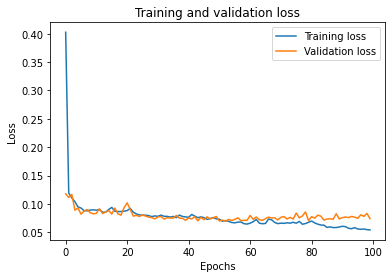

partial_x_train.shape (895, 122)
Model: "sequential_210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_609 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_610 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_611 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_612 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 0.4802 - mae: 0.4802 - val_loss: 0.1601 - val_mae: 0.1601
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss

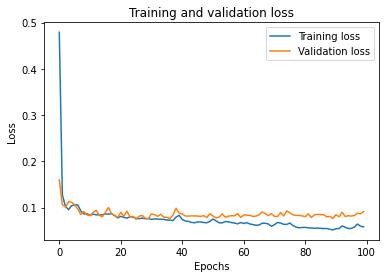

partial_x_train.shape (895, 122)
Model: "sequential_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_613 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_614 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_615 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_616 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 33ms/step - loss: 0.9636 - mae: 0.9636 - val_loss: 0.1711 - val_mae: 0.1711
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss

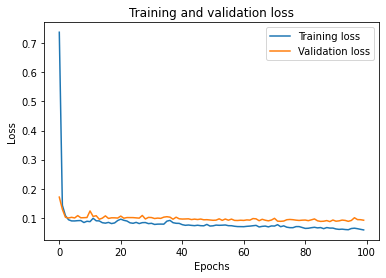

partial_x_train.shape (895, 122)
Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_617 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_618 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_619 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_620 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 80ms/step - loss: 0.6796 - mae: 0.6796 - val_loss: 0.1956 - val_mae: 0.1956
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss

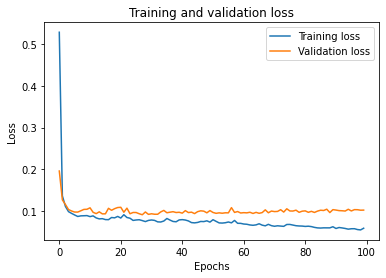

partial_x_train.shape (895, 122)
Model: "sequential_213"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_621 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_622 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_623 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_624 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 80ms/step - loss: 0.4430 - mae: 0.4430 - val_loss: 0.1103 - val_mae: 0.1103
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss

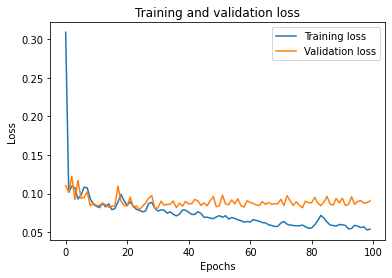

partial_x_train.shape (895, 122)
Model: "sequential_214"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_625 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_626 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_627 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_628 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 33ms/step - loss: 0.3993 - mae: 0.3993 - val_loss: 0.2065 - val_mae: 0.2065
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss

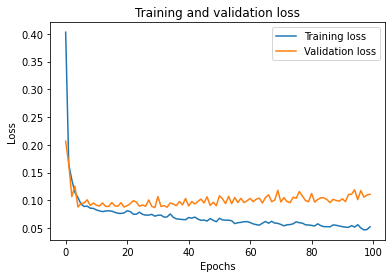

partial_x_train.shape (895, 122)
Model: "sequential_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_629 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_630 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_631 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_632 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________
(895, 122)
Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 0.5658 - mae: 0.5658 - val_loss: 0.1391 - val_mae: 0.1391
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss

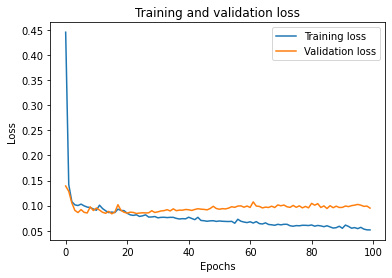

In [363]:

for fold in range(k):
  x_validation= x_training[num_validation_sample*fold : num_validation_sample*(fold+1)]   
  partial_x_train=np.vstack(( x_training[:num_validation_sample*fold] , x_training[num_validation_sample*(fold+1):]))
  print('partial_x_train.shape',partial_x_train.shape)
  
  y_validation = y_training[num_validation_sample * fold:num_validation_sample * (fold + 1)]
  partial_y_train = np.hstack((y_training[ : (num_validation_sample * fold)] , y_training[(num_validation_sample * (fold + 1)) : ]))
  model = Sequential()

  model.add(tf.keras.layers.Dense(300, input_shape=[122,]))
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  model.add(tf.keras.layers.Dense(25,activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  model.summary()
	
	#compile
  
  opt=keras.optimizers.Adam(learning_rate=0.003,epsilon=1e-07,name="Adam")
  model.compile(optimizer=opt, loss=tf.keras.losses.MeanAbsoluteError(),metrics=['mae'])
  
    
  # Standardize features by removing the mean and scaling to unit variance

  partial_x_train = partial_x_train.astype('float32')
  x_validation = x_validation.astype('float32')
  print(partial_x_train.shape)
  x_test = x_test.astype('float32')
  history = model.fit(partial_x_train,partial_y_train,epochs=100,batch_size=128,validation_data=(x_validation, y_validation))
  validation_score = model.evaluate(x_validation, y_validation)
  print('fold validation score:',validation_score)
  validation_scores.append(validation_score)

  plt.plot(history.history['mae'], label='Training loss')
  plt.plot(history.history['val_mae'], label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [365]:
avg_validation_loss = np.average(validation_scores)	#take the avg of validation scores of each fold
print("avg_validation_loss: ", avg_validation_loss)


avg_validation_loss:  0.09477133378386497


In [351]:

model = Sequential()
model.add(tf.keras.layers.Dense(300, input_shape=[122,]))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_549 (Dense)            (None, 300)               36900     
_________________________________________________________________
dense_550 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_551 (Dense)            (None, 25)                5025      
_________________________________________________________________
dense_552 (Dense)            (None, 1)                 26        
Total params: 102,151
Trainable params: 102,151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=keras.optimizers.Adam(
    learning_rate=0.003,
    #initial_accumulator_value=,
    epsilon=1e-07,
    name="Adam"
)
model.compile(optimizer=opt, loss=tf.keras.losses.MeanAbsoluteError(),metrics=['mae'])
history=model.fit(x_training, y_training, epochs=100)

In [366]:
(testloss,testerror) = model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0988 - mae: 0.0988


Text(0.5, 0, 'epoch')

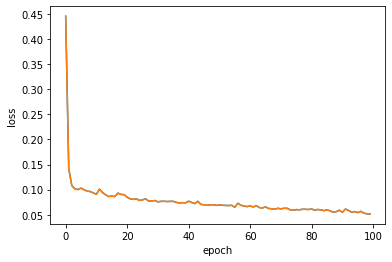

In [368]:
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [364]:
  model.save('AS1_Problem4.h5')